In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dados = pd.read_csv("Dados/credit-data.csv")

In [3]:
dados

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [4]:
dados.columns = ["ID do cliente", "Renda", "Era", "Emprestimo", "padrão"]

In [5]:
dados

,ID do cliente,Renda,Era,Emprestimo,padrão
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [6]:
dados['Renda'].unique()

array([66155.92509508, 34415.15396582, 57317.17006303, ...,
       44311.44926231, 43756.05660491, 69436.57955155])

In [7]:
dados['Renda'].value_counts()

50719.763075    1
37142.738891    1
28726.996300    1
68052.806919    1
63114.496989    1
               ..
38035.951327    1
58028.213196    1
56217.326496    1
61836.735618    1
58176.154927    1
Name: Renda, Length: 2000, dtype: int64

In [8]:
dados['Renda'].value_counts(normalize=True)

50719.763075    0.0005
37142.738891    0.0005
28726.996300    0.0005
68052.806919    0.0005
63114.496989    0.0005
                 ...  
38035.951327    0.0005
58028.213196    0.0005
56217.326496    0.0005
61836.735618    0.0005
58176.154927    0.0005
Name: Renda, Length: 2000, dtype: float64

In [9]:
dados.groupby("Renda").mean()

,ID do cliente,Era,Emprestimo,padrão
Renda,,,,
20014.489470,1453,43.202204,2426.306223,0
20063.099584,1400,24.278339,2495.132991,1
20111.363258,972,53.495395,1745.371922,0
20113.253493,1138,30.132576,2507.649710,1
20126.413768,1448,36.460944,1432.355862,0
...,...,...,...,...
69929.010996,1058,51.394448,12427.835703,0
69939.329678,1378,55.637621,2225.224533,0
69958.705541,326,30.536020,8755.691977,1


# Media

In [10]:
dados["Renda"].mean()

45331.60001779331

In [11]:
dados["Emprestimo"].mean()

4444.369694688262

In [12]:
dados["Renda"].mean()

45331.60001779331

# Medianas

In [13]:
dados["Renda"].median()

45789.11731252445

In [14]:
dados["Emprestimo"].median()

3974.7194188426342

In [15]:
dados["Renda"].median()

45789.11731252445

# Graficos

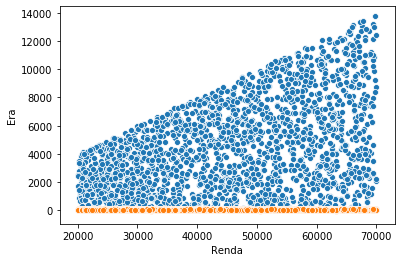

In [16]:
sns.scatterplot(x="Renda", y="Emprestimo", data=dados)
sns.scatterplot(x="Renda", y="Era", data=dados)

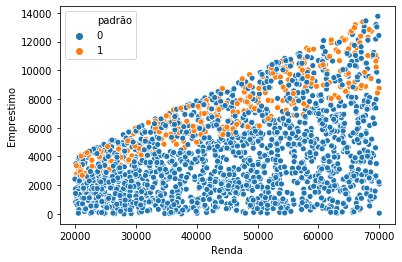

In [17]:
sns.scatterplot(x="Renda", y="Emprestimo", hue="padrão", data=dados)

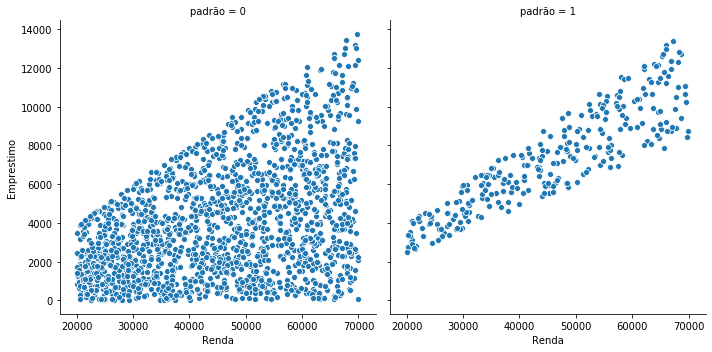

In [18]:
sns.relplot(x="Renda", y="Emprestimo", col="padrão", data=dados)

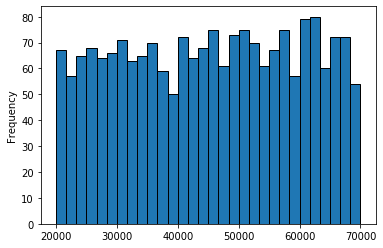

In [19]:
dados["Renda"].plot.hist(bins=30, edgecolor='black')

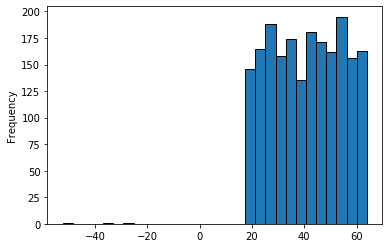

In [20]:
dados["Era"].plot.hist(bins=30, edgecolor='black')

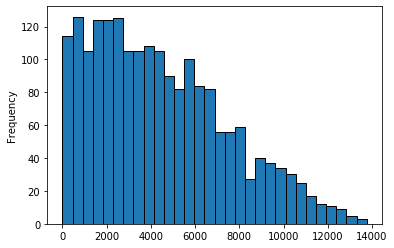

In [21]:
dados["Emprestimo"].plot.hist(bins=30, edgecolor='black')

# modelo de machine learning 

In [22]:
Renda = [6.6, 3.4, 5.7]
Era = [5.9, 4.8, 6.3]
Emprestimo = [8.1, 6.5, 8.0]

Renda_x = [4.8, 2.3, 2.8]
Emprestimo_y = [1.9, 3.5, 5.5]
Era_y = [4.8, 2.3, 6.8] 

In [23]:
treino_x = [Renda, Era, Emprestimo, Renda_x, Emprestimo_y, Era_y]
treino_y = [1,1,1,0,0,0]

In [24]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(treino_x, treino_y)

C:\Users\rafae\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [25]:
renda_oculta = [0,1,1]
model.predict([renda_oculta])

array([0])

In [26]:
renda_oculta1 = [4.8, 2.3, 2.8]
renda_oculta2 = [1.9, 3.5, 5.5]
renda_oculta3 = [4.8, 2.3, 2.8]

teste_x = [renda_oculta1, renda_oculta2, renda_oculta3]
teste_y = [1, 1, 1]

In [27]:
teste_x

[[4.8, 2.3, 2.8], [1.9, 3.5, 5.5], [4.8, 2.3, 2.8]]

In [28]:
teste_y

[1, 1, 1]

In [29]:
previsoes = model.predict(teste_x)

In [41]:
from sklearn.metrics import accuracy_score
taxa_de_acerto = accuracy_score(teste_y, previsoes)

corretos = (previsoes == teste_y).sum()

total = len(teste_x)
taxa_de_acerto = corretos/total
print("Taxa de acerto %.2f" % (taxa_de_acerto * 100))

Taxa de acerto 80.00


C:\Users\rafae\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


A acurácia foi 80.00%


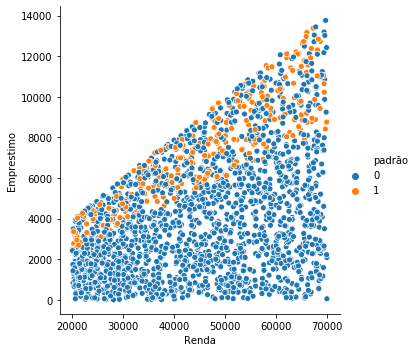

In [42]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100

print("A acurácia foi %.2f%%" % acuracia)
sns.relplot(x="Renda", y="Emprestimo", hue="padrão", data=dados)